* 2D arrays are more memory efficient compared to an array of arrays, and accessing elements are different ( a[1,3] vs. a[1][3] )

In [2]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

print( ridership[1, 3])
print( ridership[1:3, 3:5])
print( ridership[1, :]) # 2nd row

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [2]:
print (ridership[0, :] + ridership[1, :]) # vector math
print( ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [3]:
# Vectorized operations on entire arrays
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print( a + b)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [37]:
def mean_riders_for_max_station(ridership):
    # Find station with the maximum riders from all days + return the mean riders per day for that station.
    # Return the mean ridership overall for comparison.  
    overall_mean = ridership.mean()
    
    max_col = np.unravel_index(ridership.argmax(), ridership.shape)[1]
    mean_for_max_all = ridership[:,max_col].mean()
    
    # Find station with the maximum riders from FIRST day + return the mean riders per day for that station. Also
    # Return the mean ridership overall for comparison.
    overall_mean_first_day = ridership[0,:].mean()

    mean_for_max_first = ridership[0,np.argmax(ridership[0,:])].mean()
    
    return (overall_mean, mean_for_max_all,overall_mean_first_day,mean_for_max_first)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001, 1.3999999999999999, 5.0)

So the station with the most passengers on the first day had a higher overall overage over the 10 days compared to all stations.

In [40]:
def min_and_max_riders_per_day(ridership):
    # For each subway station, calculate the mean ridership per day. 
    mean_rider_per_day = ridership.mean(axis = 0)
    
    #Out of all subway stations, return the maximum and minimum mean values.
    min_daily_ridership = mean_rider_per_day.min()
    max_daily_ridership = mean_rider_per_day.max()
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

Can see the max mean and min mean are both where one would expect them to be compared to the overall mean from above

<h1> DataFrames vs. Arrays </h1>

When values are of different types in 2D NumPy Arrays, then each is converted to a string. To keep original data types, use DataFrames

In [3]:
import pandas as pd

# Create a DataFrame out of a dictionary, mapping column names to values ( --> {'col': [value1, value2], 'col2':....})
df_1 = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print(df_1)

   A  B
0  0  3
1  1  4
2  2  5


In [43]:
# Can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=['A', 'B', 'C'])
print( df_2)

   A  B  C
0  0  1  2
1  3  4  5


In [46]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007'])

# Accessing elements
print( ridership_df.iloc[0]) # 1st row
print( ridership_df.loc['05-05-11']) # row w/ that title
print( ridership_df['R003']) # that column
print( ridership_df.iloc[1, 3]) # specific cell

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [49]:
# Accessing multiple rows
print( ridership_df.iloc[1:4])
    
# Accessing multiple columns (notice double brackets)
print( ridership_df[['R003', 'R005']])

          R003  R004  R005  R006  R007
05-02-11  1478  3877  3674  2328  2539
05-03-11  1613  4088  3991  6461  2691
05-04-11  1560  3392  3826  4787  2613
          R003  R005
05-01-11     0     2
05-02-11  1478  3674
05-03-11  1613  3991
05-04-11  1560  3826
05-05-11  1608  3932
05-06-11  1576  3909
05-07-11    95   255
05-08-11     2     1
05-09-11  1438  3589
05-10-11  1342  4009


In [55]:
# Pandas axis
df = pd.DataFrame({'A': [0, 1, 2], 'B': [3, 4, 5]})
print( df.sum()) # sums rows + gives an index
print( df.sum(axis=1)) # sums cols + gives an index
print( df.values.sum()) # sum of all numeric values

A     3
B    12
dtype: int64
0    3
1    5
2    7
dtype: int64
15


In [76]:
def mean_riders_for_max_station(ridership):
    # Find station with max riders on 1st day + return mean riders per day for that station. 
    mean_for_max = ridership[[ridership.iloc[0].argmax()]].mean()
    
    # return the mean ridership overall for comparsion.
    overall_mean = ridership.values.mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership_df)

(2342.5999999999999, R006    3239.9
 dtype: float64)

<h1>NYC</h1>

In [78]:
nyc = pd.read_csv('nyc_subway_weather.csv')
nyc.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [79]:
nyc.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [89]:
import pandas as pd

def correlation(x, y):
    # standardize each value using ddof = 0 to NOT use Bessel's correction for samples
    x_std = (x - x.mean())/x.std(ddof = 0)
    y_std = (y - y.mean())/y.std(ddof = 0)
    
    # Multiply and take average 
    #    - correlation = average of (x in standard units) times (y in standard units)
    r = (x_std*y_std).mean()
    
    return r

entries = nyc['ENTRIESn_hourly']
cum_entries = nyc['ENTRIESn']
rain = nyc['meanprecipi']
temp = nyc['meantempi']

print( correlation(entries, rain))
print (correlation(entries, temp))
print( correlation(rain, temp))
print (correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


So all have weak correlations, and **entries** and **cumulative entries** have a moderate positive relationship

In [91]:
np.corrcoef(entries,cum_entries)

array([[ 1.        ,  0.58589547],
       [ 0.58589547,  1.        ]])

<h1> Pandas DataFrame Vectorized Operations </h1>

In [7]:
import pandas as pd

# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with same column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
print('Add DataFrames:')
print(df1 + df2)

    
# Adding DataFrames with overlapping column names 
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
print('Add Overlapping-Column DataFrames:')
print(df1 + df2) #adds ONLY overlapping cols


# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
print('overlapping row indexes:')
print( df1 + df2)

Add DataFrames:
    a   b   c
0  11  44  77
1  22  55  88
2  33  66  99
Add Overlapping-Column DataFrames:
    a   b   c   d
0 NaN  74  47 NaN
1 NaN  85  58 NaN
2 NaN  96  69 NaN
overlapping row indexes:
         a     b     c
row1   NaN   NaN   NaN
row2  32.0  65.0  98.0
row3  23.0  56.0  89.0
row4   NaN   NaN   NaN


In [33]:
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
print(entries_and_exits)

   ENTRIESn   EXITSn
0   3144312  1088151
1   3144335  1088159
2   3144353  1088177
3   3144424  1088231
4   3144594  1088275
5   3144808  1088317
6   3144895  1088328
7   3144905  1088331
8   3144941  1088420
9   3145094  1088753


In [20]:
def get_hourly_entries_and_exits(entries_and_exits):
    #Take a DataFrame with cumulative entries and exits (entries in 1st column, exits in 2nd)
    #Return a DataFrame with hourly entries and exits
    
    # subtract a row from the row above it by shifting all rows down
    hrly_entries_and_exits = entries_and_exits - entries_and_exits.shift() #or shift(1) to shift down by 1 period
    
    return hrly_entries_and_exits

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [34]:
def get_hourly_entries_and_exits(entries_and_exits):
    #Take a DataFrame with cumulative entries and exits (entries in 1st column, exits in 2nd)
    #Return a DataFrame with hourly entries and exits
    
    # subtract a row from the row above it by shifting all rows down
    hrly_entries_and_exits = entries_and_exits.add(-entries_and_exits.shift(),fill_value=0) # shift(1) = shift down by 1 period
    hrly_entries_and_exits.loc[0] = 0 #no change in first hour
    
    return hrly_entries_and_exits

get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,0.0,0.0
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


<h1> DataFrame applymap() </h1>

In [36]:
import pandas as pd

# DataFrame applymap()
df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
def add_one(x):
    return x + 1
        
print( df.applymap(add_one))

   a   b   c
0  2  11   6
1  3  21  11
2  4  31  16


In [39]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James'])
    
def convert_grades(grades):
    # Function to convert a given DataFrame of numerical grades to letter grades. 
    # Return a new DataFrame with the converted grade.
    
    #The conversion rule is:
    #    90-100 -> A
    #    80-89  -> B
    #    70-79  -> C
    #    60-69  -> D
    #    0-59   -> F
    
    if grades <= 59:
        grades = 'F'
    elif grades >= 60 and grades < 70:
        grades = 'D'
    elif grades >= 70 and grades < 80:
        grades = 'C'        
    elif grades >= 80 and grades < 90:
        grades = 'B'        
    else:
        grades = 'A'   
    
    return grades

grades_df.applymap(convert_grades)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [42]:
def convert_grades2(grades):
    # Function to convert a given DataFrame of numerical grades to letter grades. 
    # Return a new DataFrame with the converted grade.
    
    #The conversion rule is:
    #    90-100 -> A
    #    80-89  -> B
    #    70-79  -> C
    #    60-69  -> D
    #    0-59   -> F
    
    if grades <= 59:
        return 'F'
    elif grades >= 60 and grades < 70:
        return 'D'
    elif grades >= 70 and grades < 80:
        return 'C'        
    elif grades >= 80 and grades < 90:
        return 'B'        
    else:
        return 'A'   

grades_df.applymap(convert_grades2)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [44]:
def convert_grade(grades):

    if grades <= 59:
        return 'F'
    elif grades >= 60 and grades < 70:
        return 'D'
    elif grades >= 70 and grades < 80:
        return 'C'        
    elif grades >= 80 and grades < 90:
        return 'B'        
    else:
        return 'A'   

def convert_grades(grades):
    return grades.applymap(convert_grade)

convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


<h1> DataFrame apply() </h1>

* direct analog to apply *for Pandas Series*
* takes in a Series (DataFrame column) and returns a new Series/column
* calling apply() on a DataFrame runs the function on each column (Series) in it
* Would use this instead of applymap() if the result of the function we want to apply to each element in a DataFrame may rely on  the column
 * ex: Grading on a curve --> each col = exam --> use apply() to convert scores JUST FOR *THAT* EXAM and return converted scores in a new column (Series) and the move onto the next column
 * If using applymap(), we don't know the scores compared to other for the same exam since we're not looking at any other scores
* could also use apply() to work on rows instead via an axis argument

In [45]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)


# DataFrame apply()
def convert_grades_curve(exam_grades):
    
    # Pandas has a bult-in function qcut() that will perform this calculation
    #   - Gives bottom 10% of students grade 'F', 10% to 20% grade 'D', and so on.
    # qcut() operates on a list, array, or Series
    
    return pd.qcut(exam_grades,[0, 0.1, 0.2, 0.5, 0.8, 1],labels=['F', 'D', 'C', 'B', 'A'])

In [46]:
# See result of running the function on a single column of the DataFrame.
print( convert_grades_curve(grades_df['exam1']))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [A < B < C < D < F]


In [47]:
# qcut() does NOT work on DataFrames, but we can use apply() to call the function on each column separately
print( grades_df.apply(convert_grades_curve))

        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B


In [50]:
def standardize(df):
    # Function to standardize each column of the given DataFrame (convert value to # of standard deviations above/below mean
    
    standard_data = (df - df.mean())/df.std(ddof=0) # set ddof = 0 for DataFrames to avoid Bessel's Correction for Samples
    
    return standard_data

grades_df.apply(standardize)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [51]:
def standardize_col(col):
    return (col - col.mean()) / col.std()

standardize_col(grades_df['exam1'])

Andre     -2.196525
Barry      0.208891
Chris      0.018990
Dan       -0.170911
Emilio     0.715295
Fred      -0.487413
Greta      0.841896
Humbert   -0.803916
Ivan       1.284999
James      0.588694
Name: exam1, dtype: float64

In [53]:
def standardize2(df):
    # Function to standardize each column of the given DataFrame (convert value to # of standard deviations above/below mean
    
    return df.apply(standardize_col)
    
standardize2(grades_df)

,exam1,exam2
Andre,-2.196525,-2.186335
Barry,0.208891,0.366571
Chris,0.018990,-0.091643
Dan,-0.170911,-0.091643
Emilio,0.715295,0.628408
Fred,-0.487413,-0.418938
Greta,0.841896,1.413917
Humbert,-0.803916,-0.746234
Ivan,1.284999,0.955703
James,0.588694,0.170194


<h1> DataFrame apply() Use Case 2 </h1>

* can also use apply() to take in a column and return a *single value*
* Therefore, instead of creating a new DataFrame, it creates a new *Series* with those new values for each column, such as a Series of the second highest values in each column of a DataFrame

In [92]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# DataFrame apply() - use case 2
print( df.apply(np.mean))
print( df.apply(np.max))
print( df.apply(np.max))
print( df.apply(np.argsort))

a     3.0
b    30.0
c    15.0
dtype: float64
a     5
b    50
c    25
dtype: int64
a     5
b    50
c    25
dtype: int64
   a  b  c
0  3  1  2
1  4  0  4
2  2  4  3
3  0  2  1
4  1  3  0


In [116]:
def second_largest(df):
    # Function to return the second-largest value of each column of the input DataFrame.
    df = np.array(df.sort_values(axis=0))
    
    return df[-2]

df.apply(second_largest)

a     4
b    40
c    20
dtype: int64

In [118]:
def second_largest2(df):
    # Function to return the second-largest value of each column of the input DataFrame.
    df = df.sort() # ascending by default
    
    return df.iloc[1]

df.apply(second_largest)

a     4
b    40
c    20
dtype: int64

<h1>Adding a DataFrame to a Series </h1>

In [120]:
import pandas as pd

# Adding a Series to a square DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print( df)
print( '') # Create a blank line between outputs
print( df + s)

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


So we have a simple linear algebra addition where the Pandas Series is added to each column of the Pandas DataFrame

In [128]:
# Adding a Series to a one-row DataFrame 
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})

print( df)
print( '') # Create a blank line between outputs
print( df + s)

    0   1   2   3
0  10  20  30  40

    0   1   2   3
0  11  22  33  44


It adds the series (transposed vector) to the DataFrame

In [130]:
# Adding a Series to a one-column DataFrame
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})
    
print( df)
print( '') # Create a blank line between outputs
print( df + s)
print( '') # Create a blank line between outputs
print( df.add(s,axis='index'))

    0
0  10
1  20
2  30
3  40

    0   1   2   3
0  11 NaN NaN NaN
1  21 NaN NaN NaN
2  31 NaN NaN NaN
3  41 NaN NaN NaN

    0
0  11
1  22
2  33
3  44


So it looks like the Series is always a horizontal (transposed) vector, and it is added to a DataFrame *downward/row-wise*

In [125]:
# Adding when DataFrame column names match Series index
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })

print(s)
print( '') # Create a blank line between outputs
print( df)
print( '') # Create a blank line between outputs
print( df + s)

a    1
b    2
c    3
d    4
dtype: int64

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b    c    d
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [126]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })

print(s)
print( '') # Create a blank line between outputs
print( df)
print( '') # Create a blank line between outputs
print( df + s)

0    1
1    2
2    3
3    4
dtype: int64

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


In [131]:
# Adding when DataFrame column names don't match Series index
s = pd.Series([1, 2, 3, 4], index=['b','c','d','e'])
df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })

print(s)
print( '') # Create a blank line between outputs
print( df)
print( '') # Create a blank line between outputs
print( df + s)

b    1
c    2
d    3
e    4
dtype: int64

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a     b      c      d   e
0 NaN  51.0   92.0  133.0 NaN
1 NaN  61.0  102.0  143.0 NaN
2 NaN  71.0  112.0  153.0 NaN
3 NaN  81.0  122.0  163.0 NaN


<h1>Standardizing Each Column Again *Without apply()*</h1>

In [135]:
import pandas as pd

# Adding using +
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
print( df)
print( '' )
print( df + s) # adds Series row-by-row (horizontal --> top-down)
    
# Adding with axis='index'
print( '' )
print( df.add(s, axis='index'))   #sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
print( '')
print( df.add(s, axis='columns')) # flips series vertically and adds col-by-col

    0   1    2    3
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164

    0   1    2    3
0  11  51   91  131
1  22  62  102  142
2  33  73  113  153
3  44  84  124  164

    0   1    2    3
0  11  52   93  134
1  21  62  103  144
2  31  72  113  154
3  41  82  123  164


In [139]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    # Function to standardize each column of the given DataFrame via vectorized operations and NOT apply()
    df2 = (df - df.mean())/df.std(ddof = 0)
    
    return df2

standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [158]:
def standardize_rows(df):
    # Function to standardize each row of the given DataFrame via vectorized operations and NOT apply()
     
    mean_diff = (df.sub(df.mean(axis='columns'), # get mean from values along each column (mean of a rows via each column value) 
                 axis='index'))                  # subtract the mean from each index value
    
    stnd = mean_diff.div(df.std(ddof = 0,axis = 'columns'),  # get SD of each row
                        axis='index')                        # divide mean_diff by SD of each row from each index value
    
    return stnd

standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


<h1> Pandas groupby() </h1>

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [160]:
# Examine which records are in which groups
grouped_data = example_df.groupby('even')
print(grouped_data.groups)

{False: Index(['a', 'b', 'e'], dtype='object'), True: Index(['c', 'd', 'f', 'g'], dtype='object')}


In [161]:
# Group by multiple columns
grouped_data = example_df.groupby(['even', 'above_three'])
print( grouped_data.groups)

{(False, False): Index(['a', 'b', 'e'], dtype='object'), (True, False): Index(['c'], dtype='object'), (True, True): Index(['d', 'f', 'g'], dtype='object')}


In [164]:
# Get sum of each group
grouped_data = example_df.groupby('even')
print(grouped_data.sum())
print('')
    
# Limit columns in result -> Can take 1+ columns from the result DataFrame

# get the sum of the all columns for each group from even ("true" and "false") + subset just to value
print( grouped_data.sum()['value'])
print('')

# Can also take a subset of columns from the grouped data before collapsing to a DataFrame. 
#   - In this case, the result is the same.

# subset grouped data to just value column and sum it
print( grouped_data['value'].sum())

       above_three  value
even                     
False          0.0      5
True           3.0     16

even
False     5
True     16
Name: value, dtype: int32

even
False     5
True     16
Name: value, dtype: int32


In [167]:
subway = pd.read_csv('nyc_subway_weather.csv')
subway.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [182]:
### Group subway data by a variable of your choice + either print out mean ridership within each group or create a plot.
subway_units = subway.groupby('UNIT')
print(subway_units.groups)

subway_days = subway.groupby('day_week')

{'R003': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            158, 159, 160, 161, 162, 163, 164, 165, 166, 167],
           dtype='int64', length=168), 'R004': Int64Index([168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
            ...
            333, 334, 335, 336, 337, 338, 339, 340, 341, 342],
           dtype='int64', length=175), 'R005': Int64Index([343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
            ...
            505, 506, 507, 508, 509, 510, 511, 512, 513, 514],
           dtype='int64', length=172), 'R006': Int64Index([515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
            ...
            685, 686, 687, 688, 689, 690, 691, 692, 693, 694],
           dtype='int64', length=180), 'R007': Int64Index([695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
            ...
            855, 856, 857, 858, 859, 860, 861, 862, 863, 864],
           dtype='int64', length=170), 'R008': Int64Index([ 865,  866,  867,  868,  869,  870,  87

In [184]:
ridership_by_station = subway_units['ENTRIESn_hourly'].mean()
print(ridership_by_station)
print('')
ridership_by_day = subway_days['ENTRIESn_hourly'].mean()
print(ridership_by_day)

UNIT
R003     223.047619
R004     554.302857
R005     551.482558
R006     634.155556
R007     382.147059
R008     410.958580
R009     333.245714
R011    7366.804348
R012    8700.333333
R013    2598.774194
R016     797.076087
R017    4213.768817
R018    7808.481081
R019    3267.661290
R020    6389.865591
R021    4715.766304
R022    9534.258065
R023    6169.435484
R024    3233.913514
R025    5364.553763
R027    2983.870968
R029    7245.844086
R030    3116.037634
R031    4367.806452
R032    4466.643243
R033    8250.817204
R034    1242.923529
R035    2831.815217
R036     817.101695
R037     876.404372
           ...     
R321    1134.978495
R322    1832.128492
R323    1408.476744
R325     434.737143
R330    1052.898305
R335     500.725610
R336     117.939024
R337     175.267857
R338      27.080460
R341     554.387978
R344     527.810976
R345     561.308571
R346    1327.574713
R348     231.844828
R354     272.712575
R356    1162.198864
R358     312.005988
R370     567.551136
R371     792.92

Populating the interactive namespace from numpy and matplotlib


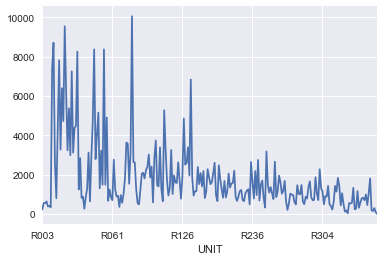

In [180]:
%pylab inline
ridership_by_station.plot()
plt.show()

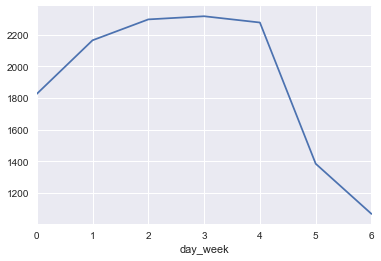

In [185]:
ridership_by_day.plot()
plt.show()

<h1> Calculating Hourly Entries and Exits </h1>

In [1]:
import numpy as np
import pandas as pd

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [2]:
# Standardize each group
def standardize(df):
    return (df - df.mean()) / df.std()

grouped_data = example_df.groupby('even')
grouped_data.groups

{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

In [3]:
# subset grouped data into just value column and standardize it
print( grouped_data['value'].apply(standardize) )

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64


In [195]:
# Find second largest value in each group
def second_largest(df):
    sorted_df = df.sort_values(inplace=False, ascending=False)
    return sorted_df.iloc[1]

print(grouped_data['value'].apply(second_largest))

even
False    1
True     4
Name: value, dtype: int64


In the quiz where you calculated hourly entries and exits, you did so for a *single* set of cumulative entries. 

However, in the original data, there was a separate set of numbers for *each* station.

Thus, to correctly calculate the hourly entries and exits, it was necessary to group by station and day, then calculate the hourly entries and exits within each day.

Write a function to do that. Use apply() to call the function. Make sure you restrict your grouped data to just the entries and exits columns, since your function may cause an error if it is called on non-numerical data types.

***Note:*** You will not be able to reproduce the ENTRIESn_hourly and EXITSn_hourly columns in the full dataset using this method. When creating the dataset, we did extra processing to remove erroneous values.

In [31]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

grouped_ridership = ridership_df.groupby('UNIT')

for key, item in grouped_ridership:
    print( grouped_ridership.get_group(key), "\n\n")

   ENTRIESn   EXITSn     TIMEn  UNIT
0   3144312  1088151  00:00:00  R051
2   3144335  1088159  04:00:00  R051
4   3144353  1088177  08:00:00  R051
6   3144424  1088231  12:00:00  R051
8   3144594  1088275  16:00:00  R051 


   ENTRIESn    EXITSn     TIMEn  UNIT
1   8936644  13755385  02:00:00  R079
3   8936658  13755393  06:00:00  R079
5   8936687  13755598  10:00:00  R079
7   8936819  13756191  14:00:00  R079 




In [32]:
def get_hourly_entries_and_exits(df):
    # Take with cumulative entries and exits (entries in 1st column, exits in 2nd)
    # Return a DataFrame with hourly entries and exits

    # subtract a row from the row above it by shifting all rows down
    hrly_grouped_df = df - df.shift()
    hrly_grouped_df.loc[0:1] = 0 

    return hrly_grouped_df

# apply our function to the desired 2 NON-string columns
grouped_ridership[['ENTRIESn','EXITSn']].apply(get_hourly_entries_and_exits)

,ENTRIESn,EXITSn
0,0.0,0.0
1,0.0,0.0
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


<h1> Combining Pandas DataFrames </h1>

In [35]:
import pandas as pd

subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

print(subway_df,'\n')
print(weather_df)

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135 

      DATEn  fog  hour   latitude  longitude  pressurei  rain  tempi  wspdi
0  05-01-11    0     0  40.689945 -73.872564      30.24     0   52.0    8.1
1  05-01-11    0     0  40.691320 -73.867135      30.24     0   52.0    8.1
2  05-02-11    0     0  40.689945 -73.872564

In [44]:
def combine_dfs(subway_df, weather_df):
    # Function to take 2 DataFrames + return a single dataframe w/ 1 row for each date, hour, and location. 
    # Only include times and locations that have both subway data and weather data available.
    # Make sure to join "on" those cols that are in BOTH dataframes
    return pd.merge(subway_df, weather_df, on = ['DATEn','hour','latitude','longitude'], how = 'inner')

combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


<h1> Plotting with DataFrames </h1>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])


# groupby() without as_index --> return 1st result
first_even = example_df.groupby('even').first()
print( first_even)

       above_three  value
even                     
False        False      1
True         False      2


In [48]:
print(first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame

KeyError: 'even'

In [55]:
# groupby() with as_index=False
first_even = example_df.groupby('even', as_index=False).first()
print( first_even)

    even  above_three  value
0  False        False      1
1   True        False      2


In [56]:
print( first_even['even'] )# Now 'even' is still a column in the DataFrame

0    False
1     True
Name: even, dtype: bool


Just like Pandas Series, DataFrames also have a plot() method. 

df.plot() will produce a line plot w/ different colored lines for each variable in the DataFrame. This can be a convenient way to get a quick look at your data, especially for small DataFrames

But for more complicated plots you will usually want to use matplotlib directly.

Create a plot of your choice showing something interesting about the NYC subway data. For example, you might create:

* Histograms of subway ridership on both days with rain and days without rain
* A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
 * If you choose this option, you may wish to use the **as_index = False** argument to groupby(), like above.
* A scatterplot with subway ridership on one axis and precipitation or temperature on the other

If you're not sure how to make the plot you want, try searching on Google or take a look at the matplotlib documentation. Once you've created a plot you're happy with, share what you've found on the forums!

In [6]:
subway_df = pd.read_csv('C:/ml/nyc_subway_weather.csv')

## Make a plot of your choice here showing something interesting about the subway data.
## Once you've got something you're happy with, share it on the forums!

In [59]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


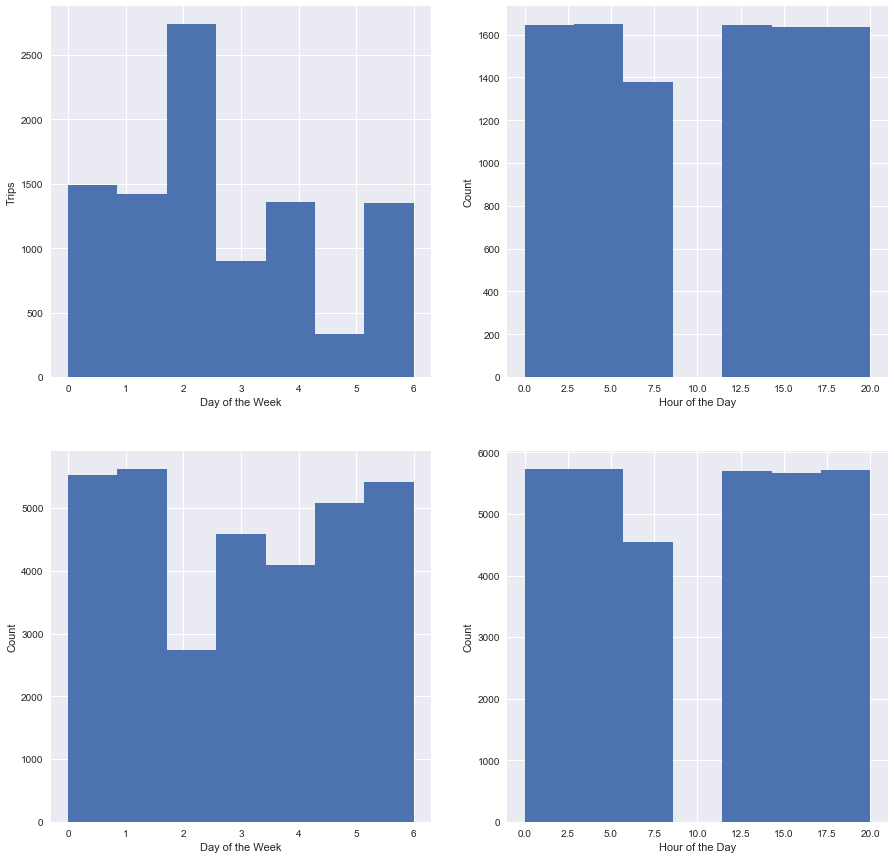

In [17]:
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(15,15)) # 2 resulting objects

axes[0,0].hist(subway_df['day_week'][subway_df['rain']==1],bins=7)
axes[0,0].set_xlabel('Day of the Week')
axes[0,0].set_ylabel('Trips')
axes[0,0].grid(True)

axes[0,1].hist(subway_df['hour'][subway_df['rain']==1],bins=7)
axes[0,1].set_xlabel('Hour of the Day')
axes[0,1].set_ylabel('Count')
axes[0,1].grid(True)

axes[1,0].hist(subway_df['day_week'][subway_df['rain']==0],bins=7)
axes[1,0].set_xlabel('Day of the Week')
axes[1,0].set_ylabel('Count')
axes[1,0].grid(True)

axes[1,1].hist(subway_df['hour'][subway_df['rain']==0],bins=7)
axes[1,1].set_xlabel('Hour of the Day')
axes[1,1].set_ylabel('Count')
axes[1,1].grid(True)

plt.show()

In [ ]:
%matplotlib inline

subway_df['day_week'][subway_df['rain'] == 1].hist()

plt.show()

<h1>Three-Dimensional Data</h1>

<h3>3D data in NumPy</h3>

NumPy arrays can have arbitrarily many dimensions. Just like you can create a 1D array from a list, and a 2D array from a list of lists, you can create a 3D array from a list of lists of lists, and so on. For example, the following code would create a 3D array:


In [9]:
a = np.array([
    [['A1a', 'A1b', 'A1c'], ['A2a', 'A2b', 'A2c']],
    [['B1a', 'B1b', 'B1c'], ['B2a', 'B2b', 'B2c']]
])
a

array([[['A1a', 'A1b', 'A1c'],
        ['A2a', 'A2b', 'A2c']],

       [['B1a', 'B1b', 'B1c'],
        ['B2a', 'B2b', 'B2c']]], 
      dtype='<U3')

<h3>3D data in Pandas</h3>

Pandas has a data structure called a **Panel**, which is similar to a DataFrame or a Series, but for 3D data. If you would like, you can learn more about Panels [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#panel).